In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [2]:
df = pd.read_json('EngTextbooksPDF_Cleaned.json', lines=True)
print(df['document'].nunique())
df.head()

46


,document,page,text
0,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",0,Student\nSolutions\nManual\n
1,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",2,Student Solutions Manual\nProbability and Stat...
2,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",3,"..,...(ENGAGE\nLearning-\n•\n© 2016 Cengage Le..."
3,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",4,CONTENTS\nChapter I Overview and Descriptive S...
4,"(9th Ed) Jay L. Devore, Matt Carlton - Probabi...",6,CHAPTER 1\nSection 1.1\n1.\na. Los Angeles Tim...


Page Count

<Axes: >

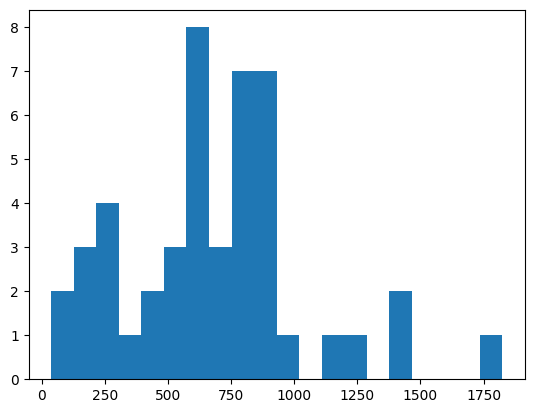

In [3]:
df.groupby('document')['page'].nunique().hist(bins=20, grid=False)

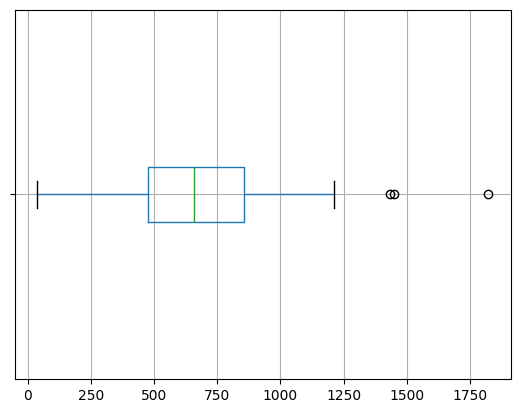

In [4]:
ax = df.groupby('document')['page'].nunique().reset_index(name='mean_page_count').boxplot(vert=False)
ax.set_yticklabels([])
plt.show()

<Axes: xlabel='mean_page_count'>

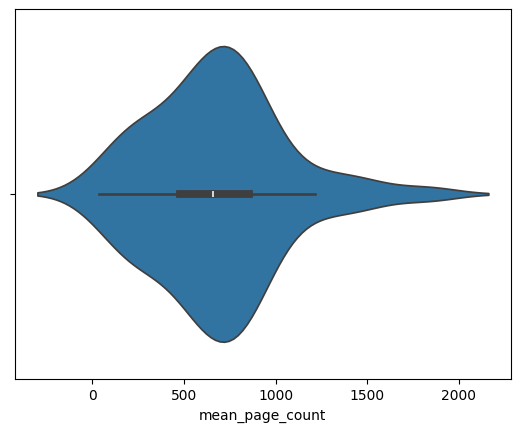

In [5]:
temp_df = df.groupby('document')['page'].nunique().reset_index(name='mean_page_count')
sns.violinplot(x=temp_df['mean_page_count'])

Character Count

In [6]:
char_count_df = df.copy()
char_count_df['char_count'] = char_count_df['text'].str.len()
char_count_df = char_count_df.groupby('document')['char_count'].mean().reset_index(name='mean_char_count')

<Axes: >

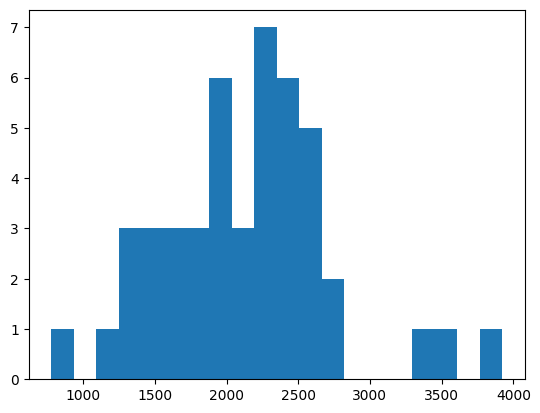

In [7]:
char_count_df['mean_char_count'].hist(bins=20, grid=False)

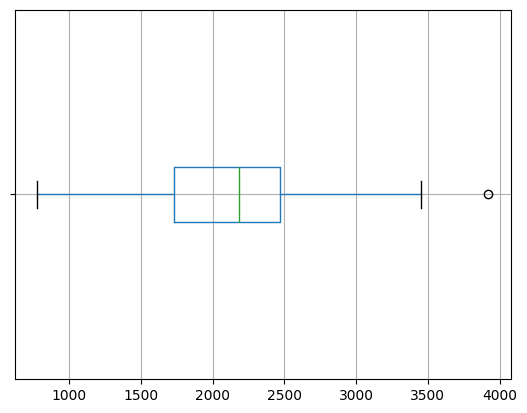

In [8]:
ax = char_count_df.boxplot('mean_char_count', vert=False)
ax.set_yticklabels([])
plt.show()

<Axes: xlabel='mean_char_count'>

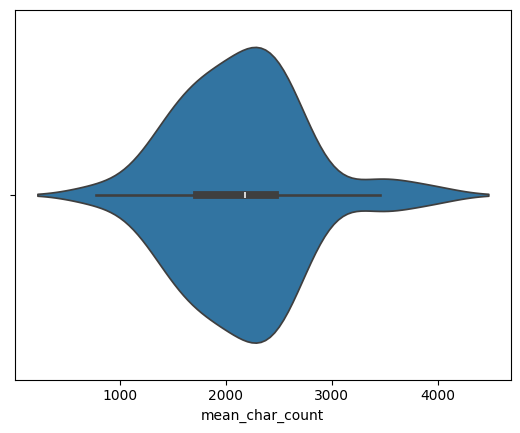

In [9]:
sns.violinplot(x=char_count_df['mean_char_count'])

Word Count

In [10]:
word_count_df = df.copy()
word_count_df['tokens'] = word_count_df['text'].apply(lambda x: nltk.word_tokenize(x))
word_count_df['token_count'] = word_count_df['tokens'].apply(len)
word_count_df = word_count_df.groupby('document')['token_count'].mean().reset_index(name='mean_word_count')

<Axes: >

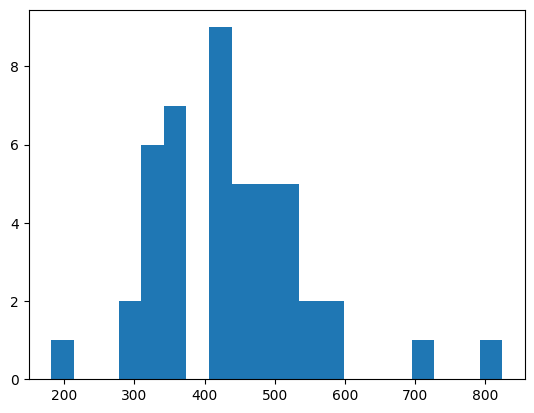

In [11]:
word_count_df['mean_word_count'].hist(bins=20, grid=False)

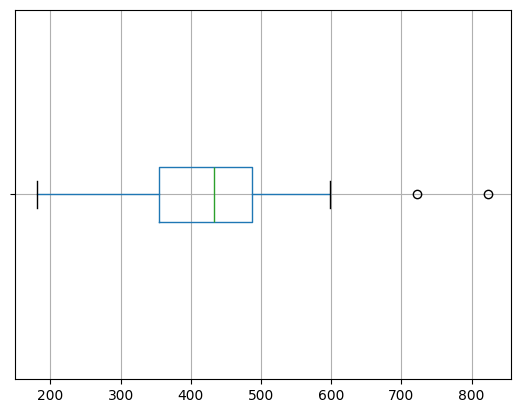

In [12]:
ax = word_count_df.boxplot('mean_word_count', vert=False)
ax.set_yticklabels([])
plt.show()

<Axes: xlabel='mean_word_count'>

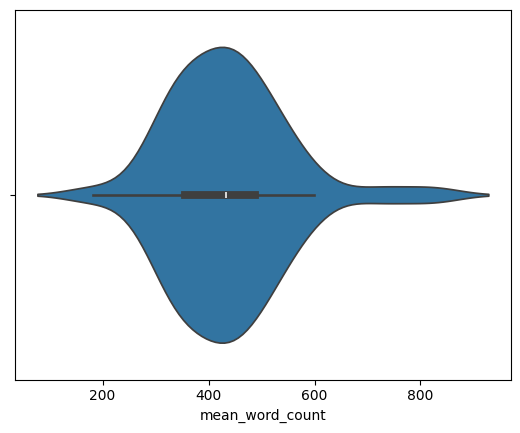

In [13]:
sns.violinplot(x=word_count_df['mean_word_count'])

Sentence Count

In [14]:
sent_count_df = df.copy()
sent_count_df['sentences'] = sent_count_df['text'].apply(lambda x: nltk.tokenize.sent_tokenize(x))
sent_count_df['sent_count'] = sent_count_df['sentences'].apply(len)
sent_count_df = sent_count_df.groupby('document')['sent_count'].mean().reset_index(name='mean_sent_count')

<Axes: >

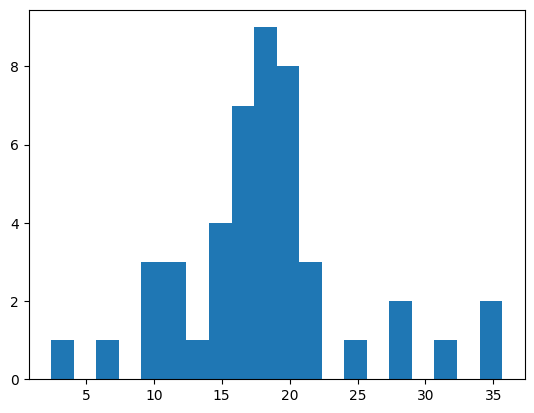

In [15]:
sent_count_df['mean_sent_count'].hist(bins=20, grid=False)

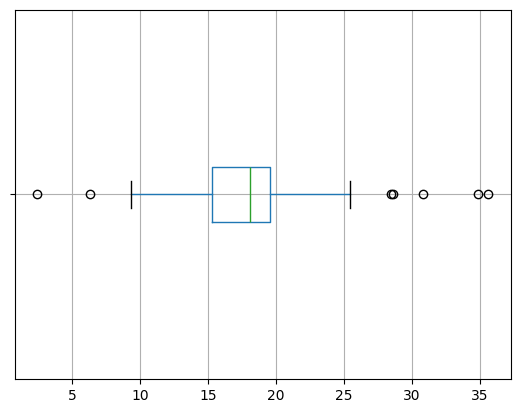

In [16]:
ax = sent_count_df.boxplot('mean_sent_count', vert=False)
ax.set_yticklabels([])
plt.show()

<Axes: xlabel='mean_sent_count'>

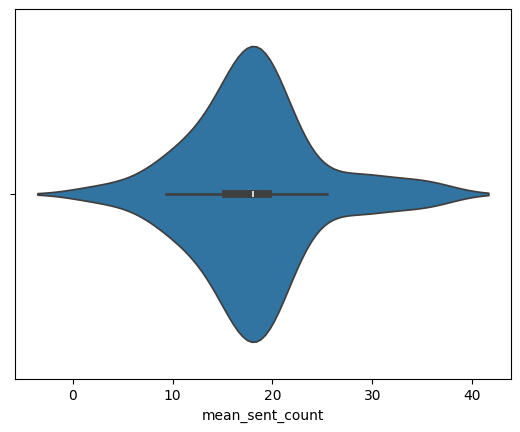

In [17]:
sns.violinplot(x=sent_count_df['mean_sent_count'])